In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("dataset.xlsx")
df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by=['crypto_name', 'date'], inplace=True)

df.head()


,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
44644,0.000000,0.516571,0.000000,0.516571,0.000000,0.000000e+00,2020-10-02T23:59:59.999Z,Aave,2020-10-02
44709,0.523836,65.305938,0.523801,53.151488,0.000000,0.000000e+00,2020-10-03T23:59:59.999Z,Aave,2020-10-03
44780,53.179858,55.070355,50.688990,52.675035,0.000000,0.000000e+00,2020-10-04T23:59:59.999Z,Aave,2020-10-04
44826,52.675035,55.112358,49.787900,53.219243,0.000000,8.912813e+07,2020-10-05T23:59:59.999Z,Aave,2020-10-05
44843,53.291969,53.402270,40.734578,42.401599,583091.459763,7.101144e+07,2020-10-06T23:59:59.999Z,Aave,2020-10-06


In [4]:
df['return'] = np.log(df['close'] / df['close'].shift(1))

df['volatility'] = (
    df.groupby('crypto_name')['return']
      .rolling(14)
      .std()
      .reset_index(0, drop=True)
)

df.dropna(inplace=True)

df[['close', 'volatility']].head()


,close,volatility
45325,39.495844,1.247635
45398,41.366993,0.090158
45457,40.746972,0.090127
45502,36.012317,0.093875
45555,32.180017,0.078958


In [5]:
df['ma_7'] = (
    df.groupby('crypto_name')['close']
      .rolling(7)
      .mean()
      .reset_index(0, drop=True)
)

df['ma_14'] = (
    df.groupby('crypto_name')['close']
      .rolling(14)
      .mean()
      .reset_index(0, drop=True)
)

df['price_range'] = df['high'] - df['low']
df['marketcap_log'] = np.log(df['marketCap'])

df.dropna(inplace=True)

df.head()


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,return,volatility,ma_7,ma_14,price_range,marketcap_log
45969,32.394082,33.155484,28.240773,29.098334,6.630479e+07,3.108008e+08,2020-10-29T23:59:59.999Z,Aave,2020-10-29,-0.107295,0.077185,35.920613,36.745603,4.914710,19.554663
46009,29.098341,31.980773,27.792461,31.217823,7.728072e+07,3.500905e+08,2020-10-30T23:59:59.999Z,Aave,2020-10-30,0.070308,0.077916,34.425068,36.154316,4.188313,19.673702
46058,31.217823,32.900161,29.610259,29.707518,5.863107e+07,3.335160e+08,2020-10-31T23:59:59.999Z,Aave,2020-10-31,-0.049589,0.076137,33.032567,35.321496,3.289902,19.625201
46121,29.707518,31.067060,28.494482,30.657276,4.956834e+07,3.454655e+08,2020-11-01T23:59:59.999Z,Aave,2020-11-01,0.031470,0.077544,31.997212,34.600804,2.572578,19.660403
46195,30.657282,33.923585,29.344650,29.731524,8.718015e+07,3.353497e+08,2020-11-02T23:59:59.999Z,Aave,2020-11-02,-0.030662,0.071796,31.096870,34.152175,4.578936,19.630684


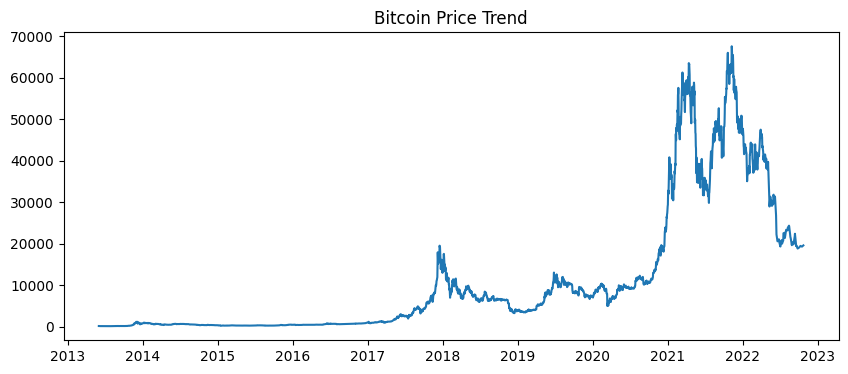

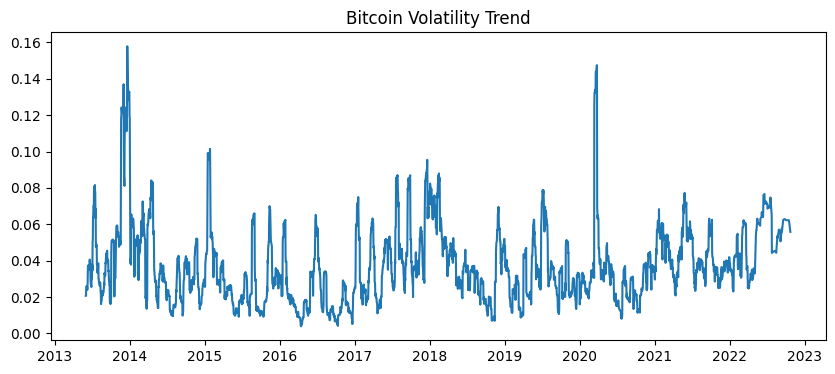

In [6]:
btc = df[df['crypto_name'] == 'Bitcoin']

plt.figure(figsize=(10,4))
plt.plot(btc['date'], btc['close'])
plt.title("Bitcoin Price Trend")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(btc['date'], btc['volatility'])
plt.title("Bitcoin Volatility Trend")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df[['open','high','low','close','ma_7','ma_14','price_range','marketcap_log']].copy()
y = df['volatility']

# Replace any infinite values with NaN and then drop rows containing NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

# Ensure y aligns with X after dropping rows
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

mean_absolute_error(y_test, pred)


0.01586969278272717